<a href="https://colab.research.google.com/github/nxxk23/kidney/blob/main/widetable/drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
prescription = pd.read_csv('/content/drive/MyDrive/kidney/ckdresearch2023/Prescription.csv')
hemo  = pd.read_csv('/content/drive/MyDrive/kidney/ckdresearch2023/Hemodialysis.csv', encoding='latin1')


In [3]:
# Create a list from hemo['PatientUID']
patient_uid_list = hemo['PatientUID'].unique().tolist()
# Remove patient UIDs from visit['PatientUID'] that are not in the list
prescription = prescription[~prescription['PatientUID'].isin(patient_uid_list)]
prescription.shape
df = pd.DataFrame(prescription)

## **DrugSummaryDF**

In [4]:
import re

# Lowercase and store values from 'DrugName' column
drugCol1 = [str(i).lower() for i in df['DrugName']]

# Lowercase and store values from 'GenericName' column
genericCol1 = [str(i).lower() for i in df['GenericName']]

# Store drug names
drugCol2 = []
genericCol2 = []

# Process 'DrugName' column
for value in drugCol1:
    if isinstance(value, str):
        if value[0].isdigit():
            drugCol2.append(value)
        else:
            valList = value.split()
            index_begin_with_digit = len(valList)
            for i in range(len(valList)):
                if valList[i][0].isdigit():
                    index_begin_with_digit = i
                    break
            newval = " ".join(valList[:index_begin_with_digit])
            drugCol2.append(newval)

# Process 'GenericName' column
for value in genericCol1:
    if isinstance(value, str):
        if value[0].isdigit():
            genericCol2.append(value)
        else:
            valList = value.split()
            index_begin_with_digit = len(valList)
            for i in range(len(valList)):
                if valList[i][0].isdigit():
                    index_begin_with_digit = i
                    break
            newval = " ".join(valList[:index_begin_with_digit])
            genericCol2.append(newval)

# Replace unwanted words and remove words starting with 'no.' and the digits following them
words_to_remove = ['inj', 'cap', 'mg', 'ml', 'tab', '[7402]', '[5702]', '[5703]', '[0604]', '[5606]', '[024840]', '[napha]', '[5704]', '(ฝาก)', '(เลิกใช้)']

drugCol3 = []
for i in drugCol2:
    for word in words_to_remove:
        i = i.replace(word, "")
    i = re.sub(r'\bno\.\d+(\.\d+)?\b', '', i)
    drugCol3.append(i.strip())

In [5]:
genericCol3 = []
for i in genericCol2:
    for word in words_to_remove:
        i = i.replace(word, "")
    i = re.sub(r'\bno\.\d+(\.\d+)?\b', '', i)
    genericCol3.append(i.strip())

In [6]:
# Create DataFrame with 'DrugName' and 'GenericName' columns
df_combined = pd.DataFrame({'DrugName': drugCol3, 'GenericName': genericCol3})

# Count unique values for 'DrugName'
drug_value_counts = df_combined['DrugName'].value_counts()

# Count unique values for 'GenericName'
generic_value_counts = df_combined['GenericName'].value_counts()

In [7]:
pre_drug = df_combined['DrugName'].value_counts().reset_index()
pre_drug.columns = ['DrugName', 'Count']

pre_generic = df_combined['GenericName'].value_counts().reset_index()
pre_generic.columns = ['GenericName', 'Count']

pre_count = df_combined.groupby(['DrugName', 'GenericName']).size().reset_index()
pre_count.columns = ['DrugName', 'GenericName', 'Count']

In [8]:
DrugSummary = pd.DataFrame(pre_count)
DrugSummary #4517

,DrugName,GenericName,Count
0,2% chlorhexidine in 70% alcohol 450,2% chlorhexidine in 70% alcohol 500,31
1,3tc 150,3tc 150,720
2,3tc 300,lamivir,268
3,3tc lamivudine 150,lamivudine mylan film-coated,10109
4,5-fu 10/0.2 . for subconjunctival,5-fu 10/0.2 . for subconjunctival,19
...,...,...,...
4512,ไหมเย็บเนื้อเยื่อเข้ากับสมอยึดตรีงกระดูก(ultra...,nan,4
4513,ไหมเย็บแผล ชนิดเส้นเดี่ยว ไม่ละลายน้ำ ผลิตจากพ...,nan,1
4514,ไหมเย็บแผล ชนิดเส้นเดี่ยว ไม่ละลายน้ำ ผลิตจากโ...,nan,1
4515,ไหมเย็บแผล ชนิดเส้นเดี่ยว ไม่ละลายน้ำ ผลิตจากโ...,nan,1


## update cleaned value

In [9]:
test = prescription.reset_index()
test

,index,PatientUID,PatientVisitUID,DispensedDttm,DrugName,GenericName,Quantity,DrugFrequency,Dosage,DosageForm,DrugDuration
0,0,2299,2024049,2558-02-19 14:48:15.693,Folic Acid 5 mg TAB,Folivit tab 5 mg,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0
1,1,2299,2024049,2558-02-19 14:48:15.693,Vitamin B Complex TAB,Vitamin B Complex TAB,180.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,90.0
2,2,2299,2024049,2558-02-19 14:48:15.693,losartan(Loranta) 50 mg TAB,Loranta film-coated tab 50 mg,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0
3,3,2299,2024049,2558-02-19 14:48:15.693,lorazepam(Anxira) 0.5 mg TAB,Anxira tab 0.5 mg,30.0,hs |วันละ 1 ครั้ง ก่อนนอน,1.0,1 TAB,30.0
4,4,2299,2024049,2558-02-19 14:47:55.953,ChalkTAB-1.5 TAB,Chalktab 1500 mg,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0
...,...,...,...,...,...,...,...,...,...,...,...
7845034,9530447,3437526,10191122,2565-12-27 03:00:00.563,Infusion plabottle set (IV.set),NaN,2.0,NaN,NaN,NaN,1.0
7845035,9530448,3437526,10191122,2565-12-27 03:00:00.563,Normal Saline 0.9% IV 1000 ml,Normal Saline 0.9% IV 1000 ml,1.0,As Direct |ใช้ตามแพทย์สั่ง,NaN,0 ml,1.0
7845036,9530449,3437526,10191122,2565-12-27 03:00:00.563,Normal Saline 0.9% IV 100 ml,Normal Saline 0.9% IV 100 ml,2.0,As Direct |ใช้ตามแพทย์สั่ง,NaN,0 ml,1.0
7845037,9530450,3437526,10191122,NaN,Minimun Volume Extension with T connector,NaN,1.0,NaN,NaN,NaN,1.0


In [10]:
test.update(df_combined)
prescription = test.iloc[:, 1:]
prescription

,PatientUID,PatientVisitUID,DispensedDttm,DrugName,GenericName,Quantity,DrugFrequency,Dosage,DosageForm,DrugDuration
0,2299,2024049,2558-02-19 14:48:15.693,folic acid,folivit,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0
1,2299,2024049,2558-02-19 14:48:15.693,vitamin b complex,vitamin b complex,180.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,90.0
2,2299,2024049,2558-02-19 14:48:15.693,losartan(loranta),loranta film-coated,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0
3,2299,2024049,2558-02-19 14:48:15.693,lorazepam(anxira),anxira,30.0,hs |วันละ 1 ครั้ง ก่อนนอน,1.0,1 TAB,30.0
4,2299,2024049,2558-02-19 14:47:55.953,chalk-1.5,chalk,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0
...,...,...,...,...,...,...,...,...,...,...
7845034,3437526,10191122,2565-12-27 03:00:00.563,infusion plabottle set (iv.set),nan,2.0,NaN,NaN,NaN,1.0
7845035,3437526,10191122,2565-12-27 03:00:00.563,normal saline,normal saline,1.0,As Direct |ใช้ตามแพทย์สั่ง,NaN,0 ml,1.0
7845036,3437526,10191122,2565-12-27 03:00:00.563,normal saline,normal saline,2.0,As Direct |ใช้ตามแพทย์สั่ง,NaN,0 ml,1.0
7845037,3437526,10191122,NaN,minimun volume extension with t connector,nan,1.0,NaN,NaN,NaN,1.0


## DrugList

In [11]:
prescription_mapping = {
    'Anti-hypertensive1': [2607,4452,8,528,529],
    'Anti-hypertensive2': [1207,1367,1368,2466,2467,174,1474,661],
    'Anti-hypertensive3': [877,878,1393,1320],
    'Anti-hypertensive4': [658,1216],
    'Anti-hypertensive5': [961,962,963,964,965,123,1100,431,1509],
    'Anti-hypertensive6': [2161],
    'Anti-hypertensive7': [1463,1834,1866,362,506],
    'Anti-hypertensive8': [696,370,371],
    'Anti-hypertensive9': [1096,94,1494,1495,1496],
    'Anti-hyperglycemic1': [117,1000,1001,1002,1003,634,635,636],
    'Anti-hyperglycemic2': [1235,2071,2579,46,1007,1008,1009],
    'Anti-hyperglycemic3': [1235,1236,2604,2380,1699,1021,2597],
    'Anti-hyperglycemic4': [1783,1699,45,46],
    'Anti-hyperglycemic5': [1380,1237,1021,1200,944],
    'Anti-hyperglycemic6': [1166,1167,1168,1169,1306,2366,1639,1640,1641,1503],
    'Anti-hyperglycemic7': [1715],
    'Anti-lipid1': [206,207,208,209,1468,2003,2094,1352,539,1345,2542],
    'Anti-lipid2': [861,862],
    'Anti-lipid3': [883,884,885],
    'Anti-hyperuricemia1': [106,107],
    'Anti-hyperuricemia2': [874],
    'Anti-hyperuricemia3': [1850,257],
    'OtherMedication1': [1263],
    'OtherMedication2': [642,643,396,1119,1120,1121,1122,1123,1401,1430,814,180,1558]
}


In [12]:
# Create new columns for labels
prescription['LabelDrug'] = ""
prescription['LabelGeneric'] = ""

# Iterate through the prescription_mapping dictionary and update 'LabelDrug' and 'LabelGeneric' columns
for prescription_name, indices in prescription_mapping.items():
    result_item_names = pre_count[pre_count.index.isin(indices)]['DrugName'].tolist()
    result_generic_names = pre_count[pre_count.index.isin(indices)]['GenericName'].tolist()
    prescription.loc[prescription['DrugName'].isin(result_item_names), 'LabelDrug'] = prescription_name
    prescription.loc[prescription['GenericName'].isin(result_generic_names), 'LabelGeneric'] = prescription_name


In [13]:
pre0 = pd.DataFrame(prescription)
pre0

,PatientUID,PatientVisitUID,DispensedDttm,DrugName,GenericName,Quantity,DrugFrequency,Dosage,DosageForm,DrugDuration,LabelDrug,LabelGeneric
0,2299,2024049,2558-02-19 14:48:15.693,folic acid,folivit,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0,,
1,2299,2024049,2558-02-19 14:48:15.693,vitamin b complex,vitamin b complex,180.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,90.0,,
2,2299,2024049,2558-02-19 14:48:15.693,losartan(loranta),loranta film-coated,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0,Anti-hypertensive2,Anti-hypertensive2
3,2299,2024049,2558-02-19 14:48:15.693,lorazepam(anxira),anxira,30.0,hs |วันละ 1 ครั้ง ก่อนนอน,1.0,1 TAB,30.0,,
4,2299,2024049,2558-02-19 14:47:55.953,chalk-1.5,chalk,90.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,90.0,,
...,...,...,...,...,...,...,...,...,...,...,...,...
7845034,3437526,10191122,2565-12-27 03:00:00.563,infusion plabottle set (iv.set),nan,2.0,NaN,NaN,NaN,1.0,,
7845035,3437526,10191122,2565-12-27 03:00:00.563,normal saline,normal saline,1.0,As Direct |ใช้ตามแพทย์สั่ง,NaN,0 ml,1.0,,
7845036,3437526,10191122,2565-12-27 03:00:00.563,normal saline,normal saline,2.0,As Direct |ใช้ตามแพทย์สั่ง,NaN,0 ml,1.0,,
7845037,3437526,10191122,NaN,minimun volume extension with t connector,nan,1.0,NaN,NaN,NaN,1.0,,


## Define ✔
> we won't use the #26 values that have fill the label as mapping value but not the index we want for example: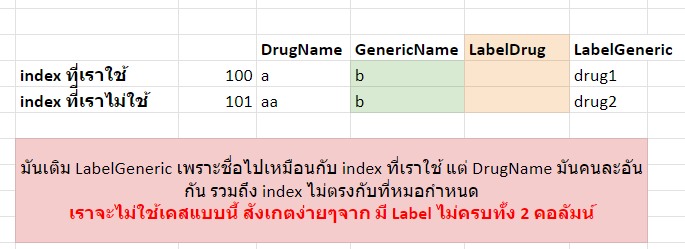

In [39]:
pre0[pre0['LabelDrug'] == 'OtherMedication2']['LabelGeneric'].unique()

array(['OtherMedication2'], dtype=object)

In [40]:
# DrugSummary.loc[[2607,4452,8,528,529]] #Drug1
# fix DrugSummary.loc[[1207,1367,1368,2466,2467,174,1474,661]] #Drug2
# fix DrugSummary.loc[[877,878,1393,1320]] #Drug3
# fix DrugSummary.loc[[877,878,1393,1320]] #Drug4
# DrugSummary.loc[[658,1216]] #Drug5
# fix DrugSummary.loc[[2161]] #Drug6
# fix DrugSummary.loc[[1463,1834,1866,362,506]] #Drug7
# DrugSummary.loc[[696,370,371]] #Drug8
# fix DrugSummary.loc[[1096,94,1494,1495,1496]] #Drug9

# fix DrugSummary.loc[[117,1000,1001,1002,1003,634,635,636]] #Drug10
# fix DrugSummary.loc[[1235,2071,2579,46,1007,1008,1009]] #Drug11
# DrugSummary.loc[[1235,1236,2604,2380,1699,1021,2597]] #Drug12
# fix DrugSummary.loc[[1783,1699,45,46]] #Drug13
# fix DrugSummary.loc[[1380,1237,1021,1200,944]] #Drug14
# fix DrugSummary.loc[[1166,1167,1168,1169,1306,2366,1639,1640,1641,1503]] #Drug15
# DrugSummary.loc[[1715]] #Drug16

# fix DrugSummary.loc[[206,207,208,209,1468,2003,2094,1352,539,1345,2542]] #Drug17
# fix DrugSummary.loc[[861,862]] #Drug17
# DrugSummary.loc[[883,884,885]] #Drug18

# fix DrugSummary.loc[[106,107]] #Drug19
# fix DrugSummary.loc[[874]] #Drug20
# fix DrugSummary.loc[[1850,257]] #Drug21

# DrugSummary.loc[[1263]] #Drug22
# DrugSummary.loc[[642,643,396,1119,1120,1121,1122,1123,1401,1430,814,180,1558]] #Drug23

## index ซ้ำ
add duplicate rows



In [41]:
pre_count.iloc[[1235,1699,1021,46]]

,DrugName,GenericName,Count
1235,janumet,janumet,4525
1699,oseni,oseni,3347
1021,glyxambi,glyxambi,29
46,actosmet,actosmet,449


In [43]:
pre0.loc[(pre0['DrugName'] == 'janumet') & (pre0['GenericName'] == 'janumet')] ##ยา 1235 ควรเป็นทั้ง Anti-hyperglycemic2 และ ตอนนี้เป็น Anti-hyperglycemic3
#pre0.loc[(pre0['DrugName'] == 'oseni') & (pre0['GenericName'] == 'oseni')] ##ยา 1699 ควรอยู่ทั้ง Anti-hyperglycemic3 และ ตอนนี้เป็น Anti-hyperglycemic4
#pre0.loc[(pre0['DrugName'] == 'glyxambi') & (pre0['GenericName'] == 'glyxambi')]  ##ยา 1021 อยู่ทั้ง Anti-hyperglycemic3 และ ตอนนี้เป็น Anti-hyperglycemic5
#pre0.loc[(pre0['DrugName'] == 'actosmet') & (pre0['GenericName'] == 'actosmet')]  ##ยา 46 ควรเป็นทั้ง Anti-hyperglycemic2 และ ตอนนี้เป็น Anti-hyperglycemic4


,PatientUID,PatientVisitUID,DispensedDttm,DrugName,GenericName,Quantity,DrugFrequency,Dosage,DosageForm,DrugDuration,LabelDrug,LabelGeneric
10767,4250,5913491,2562-01-16 11:42:19.880,janumet,janumet,200.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,100.0,Anti-hyperglycemic3,Anti-hyperglycemic3
10783,4250,6201402,2562-04-24 11:40:06.020,janumet,janumet,180.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,90.0,Anti-hyperglycemic3,Anti-hyperglycemic3
81748,10866,10000090,2565-10-28 18:39:46.390,janumet,janumet,210.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,105.0,Anti-hyperglycemic3,Anti-hyperglycemic3
101648,12722,6390097,2562-06-24 17:40:58.580,janumet,janumet,120.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,60.0,Anti-hyperglycemic3,Anti-hyperglycemic3
127149,15969,10269955,2566-01-18 10:03:02.227,janumet,janumet,210.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,105.0,Anti-hyperglycemic3,Anti-hyperglycemic3
...,...,...,...,...,...,...,...,...,...,...,...,...
7806687,3326146,9291162,2565-03-21 14:18:01.567,janumet,janumet,84.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,42.0,Anti-hyperglycemic3,Anti-hyperglycemic3
7826372,3359478,10553993,2566-04-04 12:20:14.597,janumet,janumet,105.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,105.0,Anti-hyperglycemic3,Anti-hyperglycemic3
7836901,3382800,9773373,2565-08-21 12:49:42.343,janumet,janumet,200.0,bid pc |วันละ 2 ครั้ง หลังอาหารเช้า เย็น,1.0,1 TAB,100.0,Anti-hyperglycemic3,Anti-hyperglycemic3
7836905,3382800,10418684,2566-02-26 11:42:19.683,janumet,janumet,100.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,100.0,Anti-hyperglycemic3,Anti-hyperglycemic3


>> Add Dup rows and change mapping value into another drug group that have dup index

In [46]:
# Duplicate rows for janumet
janumet_rows = pre0.loc[(pre0['DrugName'] == 'janumet') & (pre0['GenericName'] == 'janumet')].copy()
janumet_rows['LabelDrug'] = 'Anti-hyperglycemic2'
janumet_rows['LabelGeneric'] = 'Anti-hyperglycemic2'
pre0 = pd.concat([pre0, janumet_rows], ignore_index=True)

# Duplicate rows for oseni
oseni_rows = pre0.loc[(pre0['DrugName'] == 'oseni') & (pre0['GenericName'] == 'oseni')].copy()
oseni_rows['LabelDrug'] = 'Anti-hyperglycemic3'
oseni_rows['LabelGeneric'] = 'Anti-hyperglycemic3'
pre0 = pd.concat([pre0, oseni_rows], ignore_index=True)

# Duplicate rows for glyxambi
glyxambi_rows = pre0.loc[(pre0['DrugName'] == 'glyxambi') & (pre0['GenericName'] == 'glyxambi')].copy()
glyxambi_rows['LabelDrug'] = 'Anti-hyperglycemic3'
glyxambi_rows['LabelGeneric'] = 'Anti-hyperglycemic3'
pre0 = pd.concat([pre0, glyxambi_rows], ignore_index=True)

# Duplicate rows for actosmet
actosmet_rows = pre0.loc[(pre0['DrugName'] == 'actosmet') & (pre0['GenericName'] == 'actosmet')].copy()
actosmet_rows['LabelDrug'] = 'Anti-hyperglycemic2'
actosmet_rows['LabelGeneric'] = 'Anti-hyperglycemic2'
pre0 = pd.concat([pre0, actosmet_rows], ignore_index=True)


In [49]:
pre0.loc[(pre0['DrugName'] == 'janumet') & (pre0['GenericName'] == 'janumet')].shape

(9050, 12)

In [50]:
prescription = pre0[(pre0['LabelDrug'] == pre0['LabelGeneric']) & (pre0['LabelDrug'] != '')]

## **DrugWideTable**

In [52]:
GFR = pd.read_csv('/content/drive/MyDrive/kidney/GFR.csv')
GFR.drop(columns='Unnamed: 0')

,PatientUID,PatientVisitUID,CWhen,ResultItemName,ResultValue,date,datetime,PreviousDateTime
0,2299,3386255,2559-08-15 09:51:54.913,eGFR(CKD-EPI) age >=18,71.70,2016-08-15,2016-08-15 09:51:54.913,NaN
1,2299,3640924,2559-11-11 09:40:06.053,eGFR(CKD-EPI) age >=18,66.80,2016-11-11,2016-11-11 09:40:06.053,2016-08-15 09:51:54.913
2,2299,4020970,2560-03-31 10:18:54.363,eGFR(CKD-EPI) age >=18,67.20,2017-03-31,2017-03-31 10:18:54.363,2016-11-11 09:40:06.053
3,2299,4286612,2560-07-05 10:40:40.763,eGFR(CKD-EPI) age >=18,69.20,2017-07-05,2017-07-05 10:40:40.763,2017-03-31 10:18:54.363
4,2299,4546471,2560-10-03 09:19:54.710,eGFR(CKD-EPI) age >=18,63.60,2017-10-03,2017-10-03 09:19:54.710,2017-07-05 10:40:40.763
...,...,...,...,...,...,...,...,...
318670,3432056,10312896,2566-01-30 16:16:45.013,eGFR(CKD-EPI) age >=18,72.86,2023-01-30,2023-01-30 16:16:45.013,2023-01-27 12:22:43.000
318671,3432056,10408954,2566-02-24 21:05:12.747,eGFR(CKD-EPI) age >=18,68.69,2023-02-24,2023-02-24 21:05:12.747,2023-01-30 16:16:45.013
318672,3432056,10573233,2566-04-10 09:51:32.587,eGFR(CKD-EPI) age >=18,45.08,2023-04-10,2023-04-10 09:51:32.587,2023-02-24 21:05:12.747
318673,3437526,10191122,2565-12-26 09:29:11.307,eGFR(CKD-EPI) age >=18,55.94,2022-12-26,2022-12-26 09:29:11.307,2023-04-10 09:51:32.587


In [53]:
import numpy as np
# Step 1: Add an additional column to distinguish duplicate entries
prescription['DuplicateIndex'] = prescription.groupby(['PatientUID', 'PatientVisitUID']).cumcount()

# Step 2: Pivot the 'lab' DataFrame
prescription_pivoted = prescription.pivot(index=['PatientUID', 'PatientVisitUID', 'DuplicateIndex'], columns='LabelDrug', values='DrugDuration')

# Step 3: Reset the index to match the desired format
prescription_pivoted = prescription_pivoted.reset_index()

# Step 4: Fill NaN values with None using numpy.nan
prescription_pivoted = prescription_pivoted.where(pd.notna(prescription_pivoted), np.nan)

# Step 5: Merge 'CWhen' from 'prescription' into the pivoted DataFrame
final_result = pd.merge(GFR, prescription_pivoted, on=['PatientUID', 'PatientVisitUID'], how='left')


<ipython-input-53-42d1c097f68b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prescription['DuplicateIndex'] = prescription.groupby(['PatientUID', 'PatientVisitUID']).cumcount()


## Duplicate column
> จากการที่มันเป็น Duration ของการใช้ยา เราต้องนำค่ามาบวกกัน

In [54]:
final_result[final_result.duplicated(subset=['PatientVisitUID'], keep=False)]

,Unnamed: 0,PatientUID,PatientVisitUID,CWhen,ResultItemName,ResultValue,date,datetime,PreviousDateTime,DuplicateIndex,...,Anti-hypertensive8,Anti-hypertensive9,Anti-hyperuricemia1,Anti-hyperuricemia2,Anti-hyperuricemia3,Anti-lipid1,Anti-lipid2,Anti-lipid3,OtherMedication1,OtherMedication2
3,3,2299,4286612,2560-07-05 10:40:40.763,eGFR(CKD-EPI) age >=18,69.20,2017-07-05,2017-07-05 10:40:40.763,2017-03-31 10:18:54.363,0.0,...,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN
4,3,2299,4286612,2560-07-05 10:40:40.763,eGFR(CKD-EPI) age >=18,69.20,2017-07-05,2017-07-05 10:40:40.763,2017-03-31 10:18:54.363,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4,2299,4546471,2560-10-03 09:19:54.710,eGFR(CKD-EPI) age >=18,63.60,2017-10-03,2017-10-03 09:19:54.710,2017-07-05 10:40:40.763,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,2299,4546471,2560-10-03 09:19:54.710,eGFR(CKD-EPI) age >=18,63.60,2017-10-03,2017-10-03 09:19:54.710,2017-07-05 10:40:40.763,1.0,...,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN
7,5,2299,4801938,2561-01-04 09:03:28.847,eGFR(CKD-EPI) age >=18,58.40,2018-01-04,2018-01-04 09:03:28.847,2017-10-03 09:19:54.710,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074083,318659,3421352,10065483,2565-11-16 23:53:30.297,eGFR(CKD-EPI) age >=18,54.58,2022-11-16,2022-11-16 23:53:30.297,2023-03-23 09:06:38.993,6.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1074085,318661,3421578,10151787,2565-12-14 11:30:53.310,eGFR(CKD-EPI) age >=18,47.44,2022-12-14,2022-12-14 11:30:53.310,2023-03-15 13:53:58.377,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1074086,318661,3421578,10151787,2565-12-14 11:30:53.310,eGFR(CKD-EPI) age >=18,47.44,2022-12-14,2022-12-14 11:30:53.310,2023-03-15 13:53:58.377,1.0,...,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN
1074087,318662,3421578,10475532,2566-03-14 12:22:38.490,eGFR(CKD-EPI) age >=18,49.07,2023-03-14,2023-03-14 12:22:38.490,2022-12-14 11:30:53.310,0.0,...,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN


In [57]:
# List of columns to sum
columns_to_sum = ['Anti-hypertensive2', 'Anti-lipid1', 'OtherMedication2', 'Anti-hypertensive5',
                  'Anti-hypertensive7', 'Anti-hypertensive3', 'Anti-hypertensive6',
                  'Anti-hypertensive1', 'Anti-hyperglycemic2', 'Anti-hyperglycemic3',
                  'Anti-hyperglycemic1', 'Anti-lipid3', 'Anti-hyperglycemic5',
                  'Anti-hyperuricemia1', 'Anti-hypertensive9', 'Anti-hypertensive8',
                  'Anti-hyperglycemic6', 'Anti-hyperglycemic4', 'Anti-hyperuricemia2',
                  'Anti-lipid2', 'Anti-hypertensive4', 'OtherMedication1',
                  'Anti-hyperglycemic7', 'Anti-hyperuricemia3']

# Group by the specified columns and sum the values in the specified columns
sumdf = final_result.groupby(['PatientUID', 'PatientVisitUID'])[columns_to_sum].sum().reset_index()


>> ก่อนรวม

In [59]:
prescription[prescription['PatientVisitUID']==8186767]

,PatientUID,PatientVisitUID,DispensedDttm,DrugName,GenericName,Quantity,DrugFrequency,Dosage,DosageForm,DrugDuration,LabelDrug,LabelGeneric,DuplicateIndex
274,2299,8186767,2564-03-04 12:07:58.707,celebrex,celebrex,60.0,prn|เวลามีอาการ,1.0,1 CAP,14.0,OtherMedication2,OtherMedication2,0
277,2299,8186767,2564-03-04 12:08:19.623,losartan(loranta),loranta film-coated,100.0,od pc |วันละ 1 ครั้ง หลังอาหารเช้า,1.0,1 TAB,100.0,Anti-hypertensive2,Anti-hypertensive2,1
279,2299,8186767,2564-03-04 12:08:25.517,celebrex,celebrex,14.0,prn|เวลามีอาการ,1.0,1 CAP,1.0,OtherMedication2,OtherMedication2,2


>> หลังรวม

In [58]:
sumdf[sumdf['PatientVisitUID']==8186767]

,PatientUID,PatientVisitUID,Anti-hypertensive2,Anti-lipid1,OtherMedication2,Anti-hypertensive5,Anti-hypertensive7,Anti-hypertensive3,Anti-hypertensive6,Anti-hypertensive1,...,Anti-hypertensive9,Anti-hypertensive8,Anti-hyperglycemic6,Anti-hyperglycemic4,Anti-hyperuricemia2,Anti-lipid2,Anti-hypertensive4,OtherMedication1,Anti-hyperglycemic7,Anti-hyperuricemia3
23,2299,8186767,100.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
sumdf

,PatientUID,PatientVisitUID,Anti-hypertensive2,Anti-lipid1,OtherMedication2,Anti-hypertensive5,Anti-hypertensive7,Anti-hypertensive3,Anti-hypertensive6,Anti-hypertensive1,...,Anti-hypertensive9,Anti-hypertensive8,Anti-hyperglycemic6,Anti-hyperglycemic4,Anti-hyperuricemia2,Anti-lipid2,Anti-hypertensive4,OtherMedication1,Anti-hyperglycemic7,Anti-hyperuricemia3
0,2299,3386255,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2299,3640924,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2299,4020970,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2299,4286612,90.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2299,4546471,90.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318670,3432056,10312896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318671,3432056,10408954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318672,3432056,10573233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318673,3437526,10191122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
DrugDF = pd.DataFrame(sumdf)

## **Rename Columns**

In [62]:
column_rename_dict = {
    'Anti-hypertensive1': 'G1M1_ACEI',
    'Anti-hypertensive2': 'G1M2_ARB',
    'Anti-hypertensive3': 'G1M3_Dihydropyridine_CCB',
    'Anti-hypertensive4': 'G1M4_Non-dihydropyridine_CCB',
    'Anti-hypertensive5': 'G1M5_Diuretic',
    'Anti-hypertensive6': 'G1M6_MRA',
    'Anti-hypertensive7': 'G1M7_Beta_blocker',
    'Anti-hypertensive8': 'G1M8_Alpha_blocker',
    'Anti-hypertensive9': 'G1M9_Vasodilator',
    'Anti-hyperglycemic1': 'G2M1_SU',
    'Anti-hyperglycemic2': 'G2M2_Metformin',
    'Anti-hyperglycemic3': 'G2M3_DPP4_inhibitor',
    'Anti-hyperglycemic4': 'G2M4_TZD',
    'Anti-hyperglycemic5': 'G2M5_SGLT2i',
    'Anti-hyperglycemic6': 'G2M6_Insulin',
    'Anti-hyperglycemic7': 'G2M7_GLP1_RA',
    'Anti-lipid1': 'G3M1_Statin',
    'Anti-lipid2': 'G3M2_Ezetimibe',
    'Anti-lipid3': 'G3M3_Fibrate',
    'Anti-hyperuricemia1': 'G4M1_Allopurinol',
    'Anti-hyperuricemia2': 'G4M2_Febuxostat',
    'Anti-hyperuricemia3': 'G4M3_Uricosuric_agent',
    'OtherMedication1': 'G5M1_Ketoanalog_amino_acid',
    'OtherMedication2': 'G5M2_NSAIDs'
}
# Use the rename method to rename the columns
DrugDF.rename(columns=column_rename_dict, inplace=True)
DrugDF

,PatientUID,PatientVisitUID,G1M2_ARB,G3M1_Statin,G5M2_NSAIDs,G1M5_Diuretic,G1M7_Beta_blocker,G1M3_Dihydropyridine_CCB,G1M6_MRA,G1M1_ACEI,...,G1M9_Vasodilator,G1M8_Alpha_blocker,G2M6_Insulin,G2M4_TZD,G4M2_Febuxostat,G3M2_Ezetimibe,G1M4_Non-dihydropyridine_CCB,G5M1_Ketoanalog_amino_acid,G2M7_GLP1_RA,G4M3_Uricosuric_agent
0,2299,3386255,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2299,3640924,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2299,4020970,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2299,4286612,90.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2299,4546471,90.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318670,3432056,10312896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318671,3432056,10408954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318672,3432056,10573233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318673,3437526,10191122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
DrugDF.to_csv('/content/drive/MyDrive/kidney/widetable/drug.csv')